In [ ]:
### Extra code to reuse

## Exporting data to CSV
# combined_data.to_csv('file_name.csv')

## Finding what the Data Type a column is.
# data_type = IMDb_Basics['isAdult'].dtype
# print(data_type)

## Filtering dataframes for a specific values
# filtered_df = IMDB_Basics[IMDB_Basics['primaryTitle'].str.contains('Bond', case=False, na=False)]
# print(filtered_df)

# Optionally save the combined dataframe to a new CSV file
# output_file = path_to_files + 'combined_data.csv'
# combined_df.to_csv(output_file, index=False)
# print(f"Combined CSV saved to {output_file}")

# Code to troubleshoot date columns

# 1. Check for NaT values:
# If you used errors='coerce' during the conversion, you can check for NaT values, which would indicate conversion failures.
# nat_counts = all_stocks['Date'].isna().sum()
# print(f"Number of NaT values in 'Date': {nat_counts}")

# 2. Check the range of dates:
# Look at the minimum and maximum values to ensure they are within expected bounds.
# print("Earliest date:", all_stocks['Date'].min())
# print("Latest date:", all_stocks['Date'].max())

# 3. Sample random dates:
# Random sampling of dates can give you a quick spot check to see if dates look correctly formatted.
# print(all_stocks['Date'].sample(10))

# 4. Validate with known dates:
# If you know certain dates should exist in the dataset, check those specifically.
# known_dates = ["1997-05-15", "2005-07-08"]  # Example dates you expect to find
# for date in known_dates:
#     if pd.to_datetime(date) not in all_stocks['Date'].values:
#         print(f"Date {date} is not found or incorrectly formatted.")
#     else:
#         print(f"Date {date} is correctly formatted.")

# 5. Check for duplicates:
# Ensuring that there are no duplicate dates which could suggest an issue with the conversion.
# duplicate_dates = all_stocks['Date'].duplicated().sum()
# print(f"Number of duplicate dates: {duplicate_dates}")

## Remove duplicate rows based on the 'Release' column, keeping the first occurrence
# no_duplicates = no_duplicates.drop_duplicates(subset='Release', keep='first')

# # Remove the dollar sign and commas, then convert the column to numeric values
# no_duplicates['Gross'] = no_duplicates['Gross'].replace(r'[\$,]', '', regex=True).astype(float)
# # Calculate the mean of the 'Gross' column after conversion
# gross_mean = no_duplicates['Gross'].mean()
# # Now 'gross_mean' contains the average of the 'Gross' column as a float
# print(gross_mean)


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

#os.chdir('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5783 - APPLIED MICROECONOMETRICS/Project Proposal - Arya/Data')

os.chdir('/Users/tandemyoung/Library/CloudStorage/OneDrive-UniversityofArkansas/Project Proposal - Arya/Data')

In [ ]:
# # Load the datasets
# title_basics = pd.read_csv('IMDb Basics.tsv', sep='\t', low_memory=False)
# name_basics = pd.read_csv('IMDb Name Basics.tsv', sep='\t', low_memory=False)
# title_ratings = pd.read_csv('IMDb Ratings.tsv', sep='\t', low_memory=False)
# title_principals = pd.read_csv('IMDb Title Principals.tsv', sep='\t', low_memory=False)

# # Merging the datasets
# merged_data1 = pd.merge(title_basics, title_ratings, on='tconst')
# merged_data2 = pd.merge(merged_data1, title_principals, on='tconst')
# merged_df = pd.merge(merged_data2, name_basics, on='nconst')

# ## Exporting data to CSV
# merged_df.to_csv('merged_df.csv')

In [4]:
# Loading the data from CSV for all the data that was merged above
merged_df = pd.read_csv('merged_df.csv', low_memory=False)

In [5]:
# Python
print(merged_df.isnull().sum())

Unnamed: 0                0
tconst                    0
titleType                 0
primaryTitle              0
originalTitle             0
isAdult                   0
startYear                 0
endYear                   0
runtimeMinutes            0
genres                   29
averageRating             0
numVotes                  0
ordering                  0
nconst                    0
category                  0
job                       0
characters                0
primaryName               0
birthYear                 0
deathYear                 0
primaryProfession    375448
knownForTitles            0
dtype: int64


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11327769 entries, 0 to 11327768
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   tconst             object 
 2   titleType          object 
 3   primaryTitle       object 
 4   originalTitle      object 
 5   isAdult            int64  
 6   startYear          object 
 7   endYear            object 
 8   runtimeMinutes     object 
 9   genres             object 
 10  averageRating      float64
 11  numVotes           int64  
 12  ordering           int64  
 13  nconst             object 
 14  category           object 
 15  job                object 
 16  characters         object 
 17  primaryName        object 
 18  birthYear          object 
 19  deathYear          object 
 20  primaryProfession  object 
 21  knownForTitles     object 
dtypes: float64(1), int64(4), object(17)
memory usage: 1.9+ GB


In [38]:
merged_df['startYear'].nunique()

125

In [7]:
merged_df['is_actress'] = merged_df['primaryProfession'].apply(lambda x: 1 if 'actress' in str(x).split(',') else 0)
# Convert 'startYear' to integers, handling non-numeric values as NaN (errors='coerce')
merged_df['startYear'] = pd.to_numeric(merged_df['startYear'], errors='coerce')

# Create the new column with 1 if 'startYear' is after 2017, 0 otherwise
merged_df['is_after_2017'] = merged_df['startYear'].apply(lambda x: 1 if x > 2017 else 0)

# If there were non-numeric values in 'startYear', you might want to handle NaN values in 'is_after_2017'
# For example, replacing NaN with 0 (optional)
merged_df['is_after_2017'].fillna(0, inplace=True)

merged_df['is_action'] = merged_df['genres'].str.contains('Action', na=False).astype(int)
merged_df['is_drama'] = merged_df['genres'].str.contains('Drama', na=False).astype(int)
merged_df['is_romance'] = merged_df['genres'].str.contains('Romance', na=False).astype(int)
merged_df['is_scifi'] = merged_df['genres'].str.contains('Sci-Fi', na=False).astype(int)
merged_df['is_comedy'] = merged_df['genres'].str.contains('Comedy', na=False).astype(int)
merged_df['is_adventure'] = merged_df['genres'].str.contains('Adventure', na=False).astype(int)
merged_df['is_documentary'] = merged_df['genres'].str.contains('Documentary', na=False).astype(int)
merged_df['is_fantasy'] = merged_df['genres'].str.contains('Fantasy', na=False).astype(int)
merged_df['is_history'] = merged_df['genres'].str.contains('History', na=False).astype(int)
merged_df['is_horror'] = merged_df['genres'].str.contains('Horror', na=False).astype(int)
merged_df['is_biography'] = merged_df['genres'].str.contains('Biography', na=False).astype(int)

merged_df['isAdult'] = pd.to_numeric(merged_df['isAdult'], errors='coerce')
merged_df['runtimeMinutes'] = pd.to_numeric(merged_df['runtimeMinutes'], errors='coerce')
merged_df['birthYear'] = pd.to_numeric(merged_df['birthYear'], errors='coerce')
merged_df['endYear'] = pd.to_numeric(merged_df['endYear'], errors='coerce')

In [8]:
merged_df['titleType'].unique()

array(['short', 'movie', 'tvEpisode', 'video', 'tvSpecial', 'tvMovie',
       'tvSeries', 'tvMiniSeries', 'videoGame', 'tvShort'], dtype=object)

In [9]:
# # Filtering dataframes for a specific values
merged_df = merged_df[merged_df['titleType'].str.contains('movie', case=False, na=False)]

In [10]:
merged_df['titleType'].unique()

array(['movie', 'tvMovie'], dtype=object)

In [16]:
merged_df

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,is_drama,is_romance,is_scifi,is_comedy,is_adventure,is_documentary,is_fantasy,is_history,is_horror,is_biography
594,594,tt0094205,movie,Ubu and the Big Thug,Ubu et la grande Gidouille,0,1979.0,NaN,80.0,"Animation,Crime,Drama",...,1,0,0,0,0,0,0,0,0,0
602,602,tt0004457,movie,The Patchwork Girl of Oz,The Patchwork Girl of Oz,0,1914.0,NaN,81.0,"Adventure,Comedy,Family",...,0,0,0,1,1,0,0,0,0,0
637,637,tt15772560,tvMovie,"L'oeil, le pinceau et le cinématographe : nais...","L'oeil, le pinceau et le cinématographe : nais...",0,2021.0,NaN,53.0,Documentary,...,0,0,0,0,0,1,0,0,0,0
642,642,tt3856408,movie,Making Waves: The Art of Cinematic Sound,Making Waves: The Art of Cinematic Sound,0,2019.0,NaN,94.0,Documentary,...,0,0,0,0,0,1,0,0,0,0
645,645,tt4381018,movie,Edison,Edison,0,2015.0,NaN,113.0,\N,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11327764,11327764,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,NaN,116.0,Drama,...,1,0,0,0,0,0,0,0,0,0
11327765,11327765,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,NaN,116.0,Drama,...,1,0,0,0,0,0,0,0,0,0
11327766,11327766,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,NaN,116.0,Drama,...,1,0,0,0,0,0,0,0,0,0
11327767,11327767,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,NaN,116.0,Drama,...,1,0,0,0,0,0,0,0,0,0


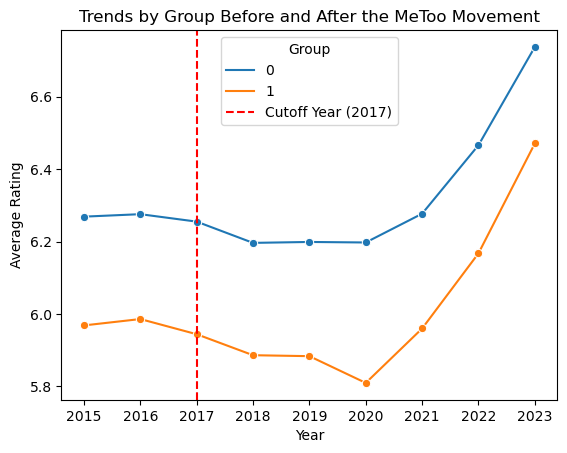

In [36]:
# Filter the DataFrame for the years you're interested in
full_period = merged_df[(merged_df['startYear'] >= 2015)]

# Group the data by year and 'is_actress' to calculate the average rating
grouped_full = full_period.groupby(['startYear', 'is_actress'])['averageRating'].mean().reset_index()

# Use seaborn lineplot to plot the trends for the entire period
sns.lineplot(x='startYear', y='averageRating', hue='is_actress', data=grouped_full, marker='o')

# Add a vertical line for the cutoff year
plt.axvline(x=2017, color='red', linestyle='--', label='Cutoff Year (2017)')

# Title and labels
plt.title('Trends by Group Before and After the MeToo Movement')
plt.legend(title='Group')
plt.xlabel('Year')
plt.ylabel('Average Rating')

plt.savefig('did_graph.png', dpi=300, transparent=False)

# Show the plot
plt.show()

# <font color='Red'>Note: 

- I added the code to filter out movies.
- Do we need to add controls and create new graph for it?
- What about the DID chart we had which looked good. Can we create that again?

In [12]:
columns = merged_df.columns.tolist()
columns

['Unnamed: 0',
 'tconst',
 'titleType',
 'primaryTitle',
 'originalTitle',
 'isAdult',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'genres',
 'averageRating',
 'numVotes',
 'ordering',
 'nconst',
 'category',
 'job',
 'characters',
 'primaryName',
 'birthYear',
 'deathYear',
 'primaryProfession',
 'knownForTitles',
 'is_actress',
 'is_after_2017',
 'is_action',
 'is_drama',
 'is_romance',
 'is_scifi',
 'is_comedy',
 'is_adventure',
 'is_documentary',
 'is_fantasy',
 'is_history',
 'is_horror',
 'is_biography']

In [13]:
pip install pydid

  Obtaining dependency information for pydid from https://files.pythonhosted.org/packages/30/59/2d20204e78ec8a2c1de3792a3e686284e38d5da6367d27fbf87a9fa4ac92/pydid-0.4.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [15]:
grouped_full.describe()

,startYear,is_actress,averageRating
count,18.000000,18.000000,18.000000
mean,2019.000000,0.500000,6.163787
std,2.656845,0.514496,0.242939
min,2015.000000,0.000000,5.809651
25%,2017.000000,0.000000,5.962034
50%,2019.000000,0.500000,6.196840
75%,2021.000000,1.000000,6.273832
max,2023.000000,1.000000,6.737316


In [19]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


# With Merged_DF

In [29]:
# Example data loading
#df = pd.read_csv('your_data.csv')  # Replace with your data file

# DiD model using statsmodels
model = smf.ols('averageRating ~ is_actress * is_after_2017', data=merged_df)
results = model.fit()

# Print the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3785.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:05:23   Log-Likelihood:            -5.3463e+06
No. Observations:             3115684   AIC:                         1.069e+07
Df Residuals:                 3115680   BIC:                         1.069e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [33]:
# Example data loading
#df = pd.read_csv('your_data.csv')  # Replace with your data file

# DiD model using statsmodels
model = smf.ols('averageRating ~ is_actress * is_after_2017 + numVotes + runtimeMinutes + isAdult + is_action + is_drama + is_romance + is_scifi + is_comedy + is_adventure + is_documentary + is_fantasy + is_history + is_horror + is_biography', data=merged_df)
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                 3.723e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:26:23   Log-Likelihood:            -4.4897e+06
No. Observations:             2812462   AIC:                         8.979e+06
Df Residuals:                 2812444   BIC:                         8.980e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Films >= 2015

In [34]:
# Example data loading
#df = pd.read_csv('your_data.csv')  # Replace with your data file

# DiD model using statsmodels
model = smf.ols('averageRating ~ is_actress * is_after_2017', data=full_period)
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1711.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:39:09   Log-Likelihood:            -1.4491e+06
No. Observations:              798354   AIC:                         2.898e+06
Df Residuals:                  798350   BIC:                         2.898e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [35]:
# Example data loading
#df = pd.read_csv('your_data.csv')  # Replace with your data file

# DiD model using statsmodels
model = smf.ols('averageRating ~ is_actress * is_after_2017 + numVotes + runtimeMinutes + isAdult + is_action + is_drama + is_romance + is_scifi + is_comedy + is_adventure + is_documentary + is_fantasy + is_history + is_horror + is_biography', data=full_period)
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:39:14   Log-Likelihood:            -1.2074e+06
No. Observations:              724165   AIC:                         2.415e+06
Df Residuals:                  724147   BIC:                         2.415e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [46]:
# Filter the DataFrame for the years you're interested in
parallel = merged_df[(merged_df['startYear'] == 2015) | (merged_df['startYear'] == 2016)]
parallel['after'] = parallel['startYear'].apply(lambda x: 1 if x > 2015 else 0)
parallel

/var/folders/g5/r6m7zvh93m972bmk3vx2jztr0000gn/T/ipykernel_9798/2210457313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parallel['after'] = parallel['startYear'].apply(lambda x: 1 if x > 2015 else 0)


,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,is_romance,is_scifi,is_comedy,is_adventure,is_documentary,is_fantasy,is_history,is_horror,is_biography,after
645,645,tt4381018,movie,Edison,Edison,0,2015.0,NaN,113.0,\N,...,0,0,0,0,0,0,0,0,0,0
3350,3350,tt5970960,tvMovie,"Charles Pathé et Léon Gaumont, premiers géants...","Charles Pathé et Léon Gaumont, premiers géants...",0,2016.0,NaN,86.0,Documentary,...,0,0,0,0,1,0,0,0,0,1
4351,4351,tt1661199,movie,Cinderella,Cinderella,0,2015.0,NaN,105.0,"Adventure,Drama,Family",...,0,0,0,1,0,0,0,0,0,0
4368,4368,tt5078202,movie,Sleeping Beauty,Belle Dormant,0,2016.0,NaN,82.0,"Comedy,Drama,Fantasy",...,0,0,1,0,0,1,0,0,0,1
5841,5841,tt11448020,movie,The Merchant of Venice,The Merchant of Venice,0,2016.0,NaN,150.0,Drama,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11327474,11327474,tt9906278,movie,A Classic Tour of Scotland: Footloose Special,A Classic Tour of Scotland: Footloose Special,0,2016.0,NaN,151.0,Documentary,...,0,0,0,0,1,0,0,0,0,1
11327475,11327475,tt9907396,movie,Footloose in the Cotswolds: Part 1,Footloose in the Cotswolds: Part 1,0,2016.0,NaN,118.0,Documentary,...,0,0,0,0,1,0,0,0,0,1
11327476,11327476,tt9905932,movie,Footloose in London: All the Best Sights of ou...,Footloose in London: All the Best Sights of ou...,0,2016.0,NaN,106.0,Documentary,...,0,0,0,0,1,0,0,0,0,1
11327477,11327477,tt9906278,movie,A Classic Tour of Scotland: Footloose Special,A Classic Tour of Scotland: Footloose Special,0,2016.0,NaN,151.0,Documentary,...,0,0,0,0,1,0,0,0,0,1


In [49]:
model = smf.ols('averageRating ~ is_actress * after', data=parallel)
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.97e-234
Time:                        21:12:46   Log-Likelihood:            -3.3178e+05
No. Observations:              186075   AIC:                         6.636e+05
Df Residuals:                  186071   BIC:                         6.636e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.2687      0.005  

In [48]:
model = smf.ols('averageRating ~ is_actress * after + numVotes + runtimeMinutes + isAdult + is_action + is_drama + is_romance + is_scifi + is_comedy + is_adventure + is_documentary + is_fantasy + is_history + is_horror + is_biography', data=parallel)
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     3370.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:20   Log-Likelihood:            -2.7772e+05
No. Observations:              170509   AIC:                         5.555e+05
Df Residuals:                  170491   BIC:                         5.557e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.7742      0.015  